In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'C:\Users\suhas\OneDrive\Documents\projects\prodigy\sec prj\archive\Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Check for missing values
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Drop the 'CustomerID' column since it's irrelevent for clustering
data = data.drop(columns=['CustomerID'])

# Separate features into categorical and numerical columns
categorical_features = ['Gender']
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create a column transformer with pipelines for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])

# Apply the transformations
preprocessed_data = preprocessor.fit_transform(data)

# Convert the preprocessed data back to a DataFrame
preprocessed_data_df = pd.DataFrame(preprocessed_data, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female'])
print(preprocessed_data_df.head())

        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female
0 -1.424569           -1.738999               -0.434801            1.0
1 -1.281035           -1.738999                1.195704            1.0
2 -1.352802           -1.700830               -1.715913            0.0
3 -1.137502           -1.700830                1.040418            0.0
4 -0.563369           -1.662660               -0.395980            0.0


In [6]:
preprocessed_data_df.to_csv('Preprocessed_Mall_Customers.csv', index=False)

In [7]:
data = pd.read_csv(r'C:\Users\suhas\OneDrive\Documents\projects\prodigy\sec prj\Preprocessed_Mall_Customers.csv')
data.head()
data.describe()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
count,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,-9.769963e-17,-2.131628e-16,-1.287859e-16,0.440000
std,1.002509e+00,1.002509e+00,1.002509e+00,0.497633
min,-1.496335e+00,-1.738999e+00,-1.910021e+00,0.000000
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01,0.000000
50%,-2.045351e-01,3.587926e-02,-7.764312e-03,0.000000
75%,7.284319e-01,6.656748e-01,8.851316e-01,1.000000
max,2.235532e+00,2.917671e+00,1.894492e+00,1.000000


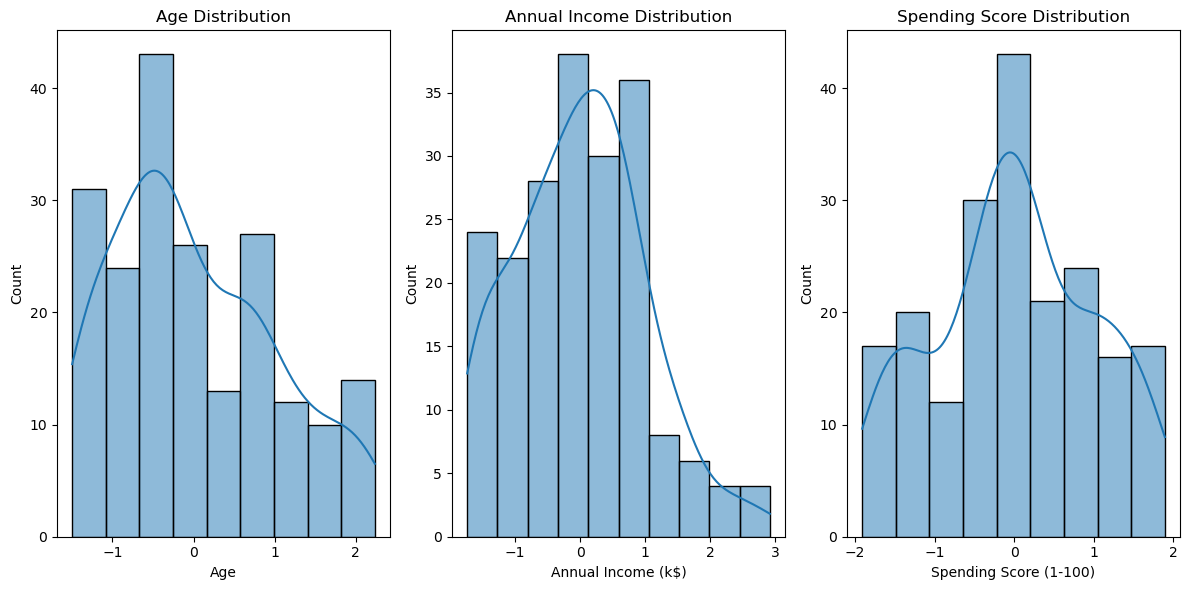

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

### Correlation Matrix

                             Age  Annual Income (k$)  Spending Score (1-100)  \
Age                     1.000000           -0.012398               -0.327227   
Annual Income (k$)     -0.012398            1.000000                0.009903   
Spending Score (1-100) -0.327227            0.009903                1.000000   
Gender_Female           0.060867            0.056410               -0.058109   

                        Gender_Female  
Age                          0.060867  
Annual Income (k$)           0.056410  
Spending Score (1-100)      -0.058109  
Gender_Female                1.000000  


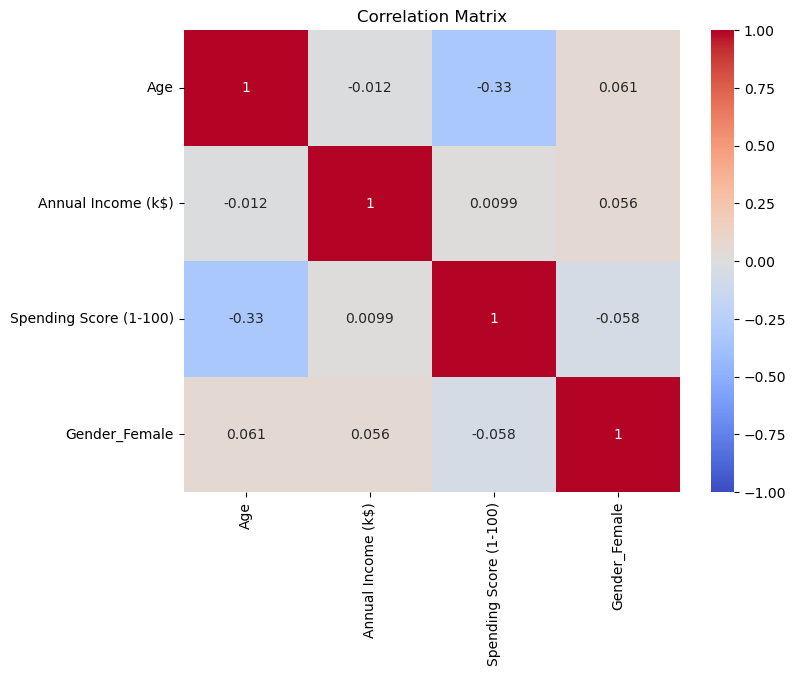

In [9]:
correlation_matrix = data.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

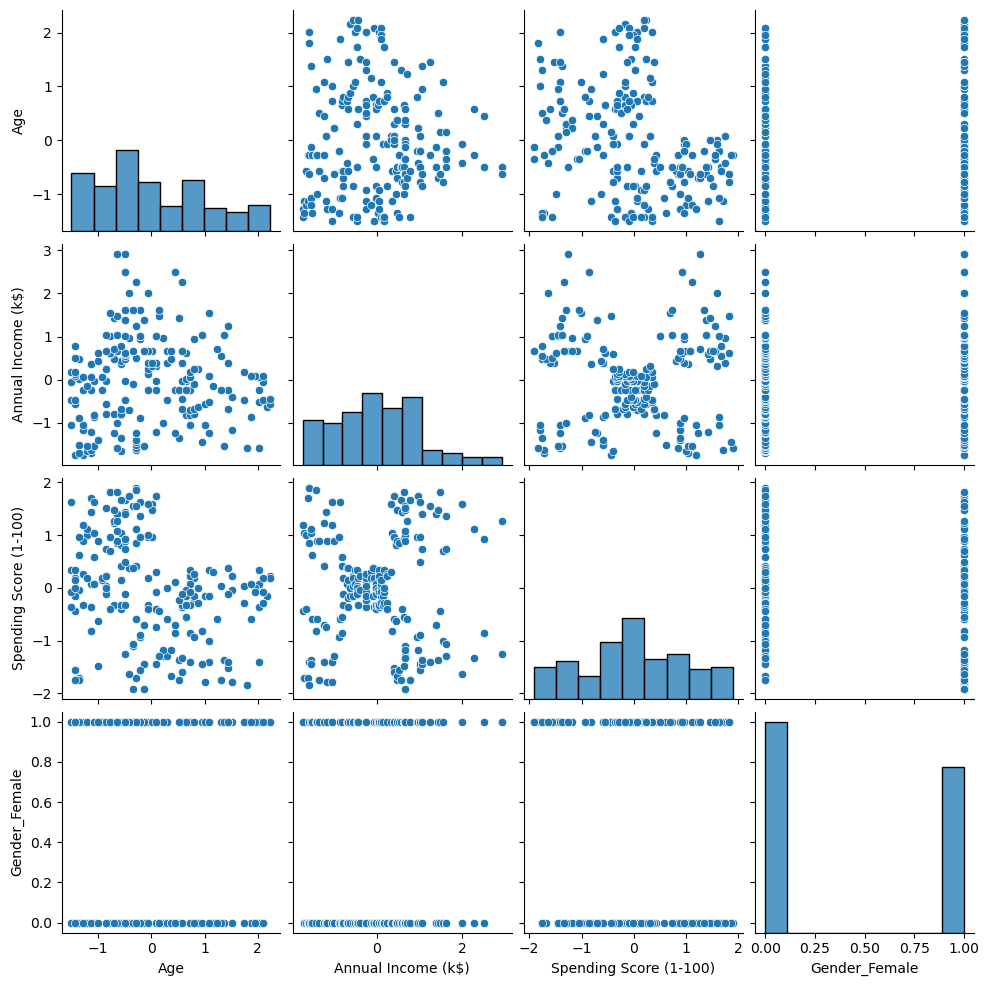

In [10]:
sns.pairplot(data)
plt.show()

### Outlier Check

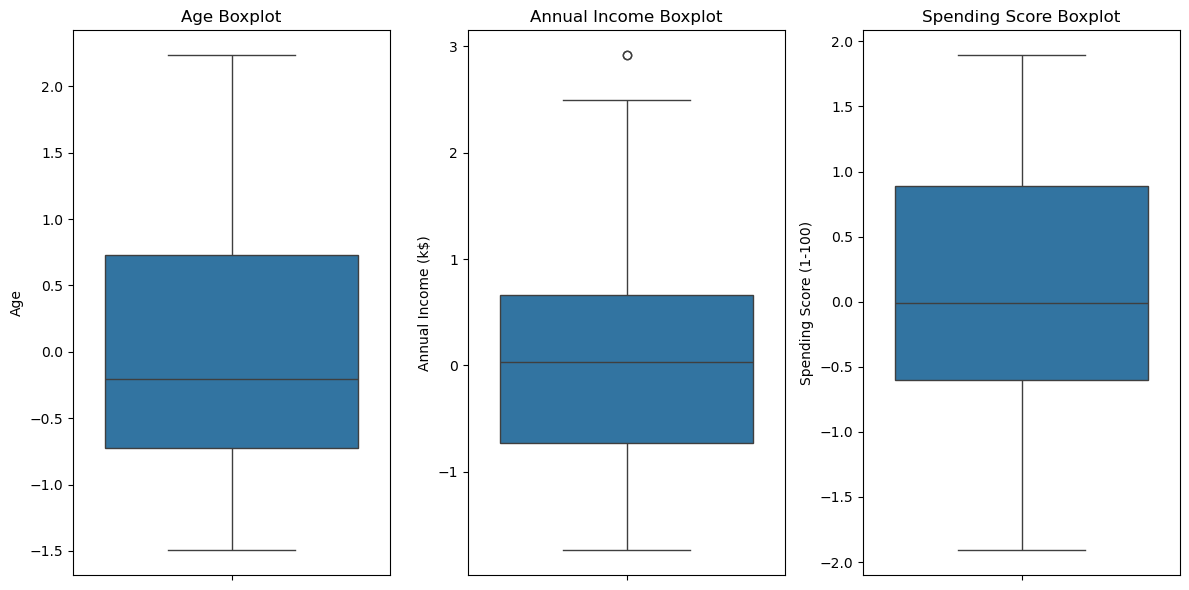

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=data['Age'])
plt.title('Age Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(y=data['Annual Income (k$)'])
plt.title('Annual Income Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(y=data['Spending Score (1-100)'])
plt.title('Spending Score Boxplot')

plt.tight_layout()
plt.show()

                    Age  Annual Income (k$)  Spending Score (1-100)
Gender_Female                                                      
0.0           -0.053953           -0.050002                0.051508
1.0            0.068668            0.063639               -0.065555


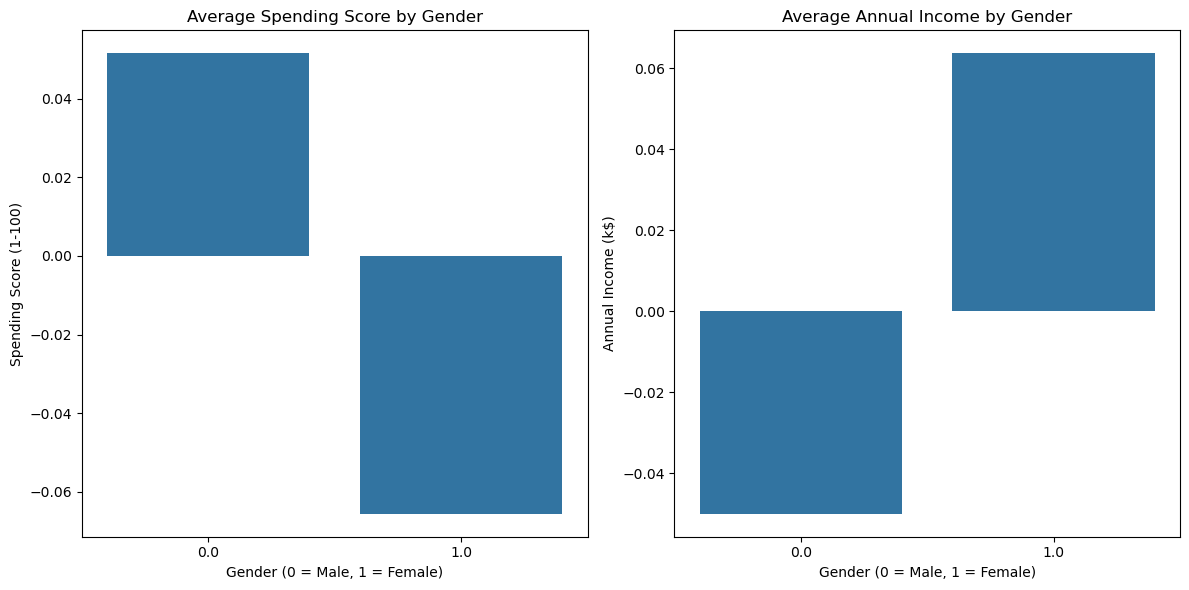

In [12]:
gender_groups = data.groupby('Gender_Female').mean()
print(gender_groups)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=gender_groups.index, y=gender_groups['Spending Score (1-100)'])
plt.title('Average Spending Score by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Spending Score (1-100)')

plt.subplot(1, 2, 2)
sns.barplot(x=gender_groups.index, y=gender_groups['Annual Income (k$)'])
plt.title('Average Annual Income by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Annual Income (k$)')

plt.tight_layout()
plt.show()

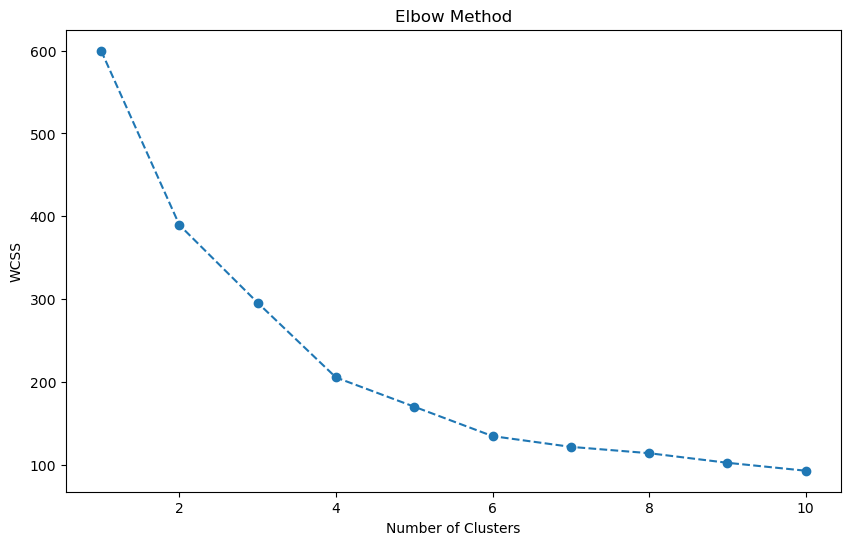

In [13]:
data = pd.read_csv('Preprocessed_Mall_Customers.csv')

# Drop the 'Gender_Female' column
data_for_clustering = data.drop(columns=['Gender_Female'])

wcss = []
max_clusters = 10
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_for_clustering)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

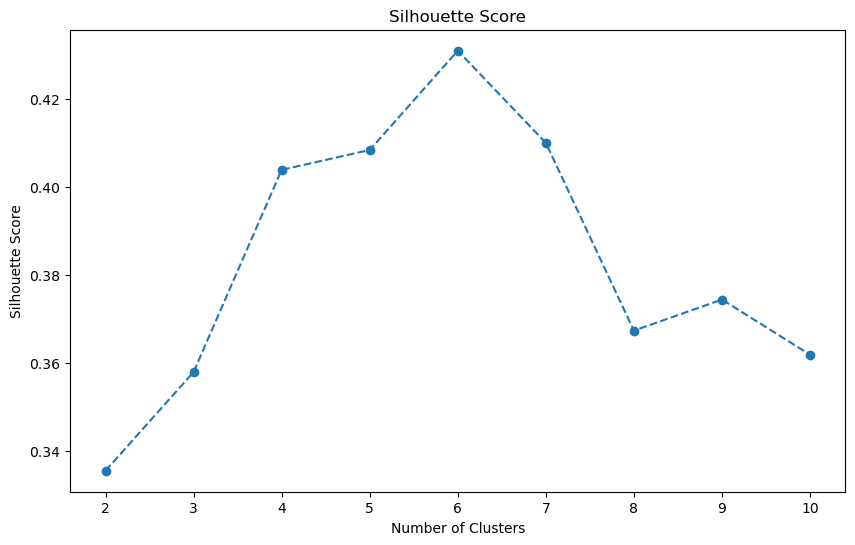

In [14]:
sil_scores = []
for i in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_for_clustering)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(data_for_clustering, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters+1), sil_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

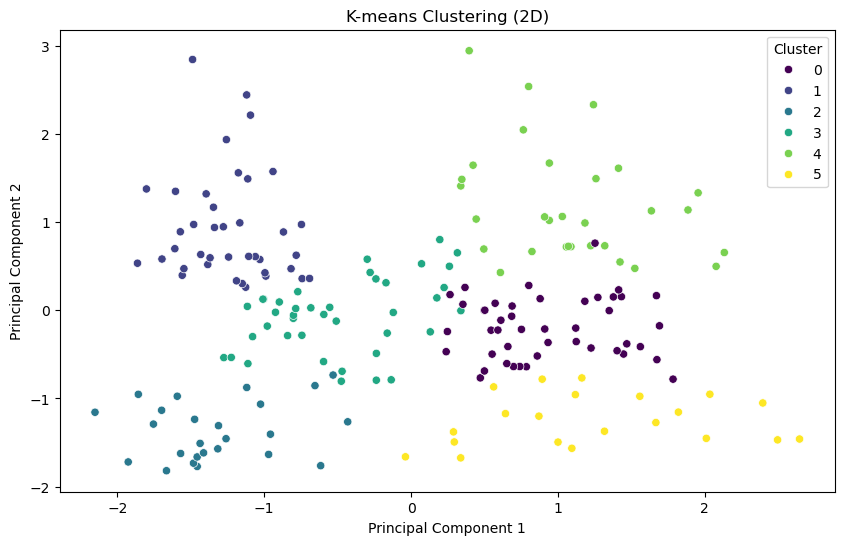

In [15]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_for_clustering)
cluster_labels = kmeans.labels_

# Visualize the clusters in 2D using PCA for dimensionality reduction
pca = PCA(n_components = 2, random_state = 42)
data_2d = pca.fit_transform(data_for_clustering)

# Create a DataFrame with the reduced data and cluster labels
clustered_data_2d = pd.DataFrame({'PC1': data_2d[:, 0], 'PC2': data_2d[:, 1], 'Cluster': cluster_labels})

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustered_data_2d, x='PC1', y='PC2', hue='Cluster', palette='viridis', legend='full')
plt.title('K-means Clustering (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

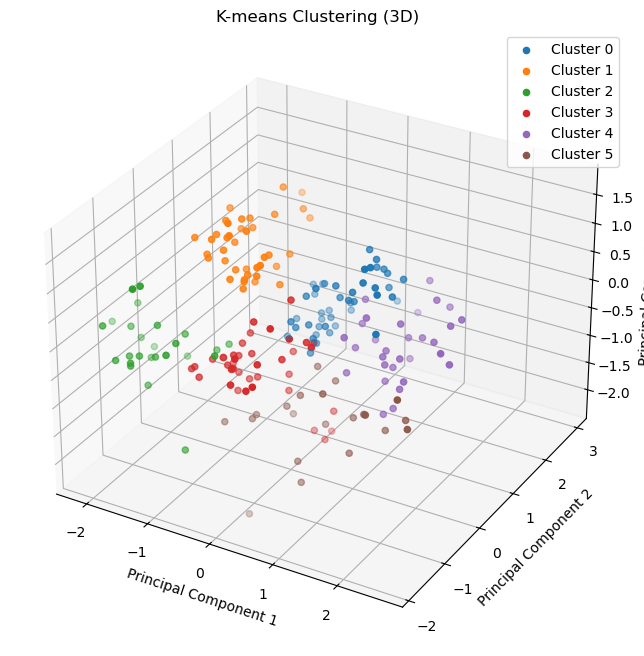

In [16]:
# Visualize the clusters in 3D using PCA for dimensionality reduction
pca = PCA(n_components=3, random_state=42)
data_3d = pca.fit_transform(data_for_clustering)

# Create a DataFrame with the reduced data and cluster labels
clustered_data_3d = pd.DataFrame({'PC1': data_3d[:, 0], 'PC2': data_3d[:, 1], 'PC3': data_3d[:, 2], 'Cluster': cluster_labels})

# Plot the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(k):
    clustered_points = clustered_data_3d[clustered_data_3d['Cluster'] == cluster]
    ax.scatter(clustered_points['PC1'], clustered_points['PC2'], clustered_points['PC3'], label=f'Cluster {cluster}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('K-means Clustering (3D)')
ax.legend()
plt.show()

               Age        Annual Income (k$)        Spending Score (1-100)  \
              mean median               mean median                   mean   
Cluster                                                                      
0        56.333333   54.0          54.266667   54.0              49.066667   
1        32.692308   32.0          86.538462   79.0              82.128205   
2        25.560000   24.0          26.480000   25.0              76.240000   
3        26.125000   25.0          59.425000   60.0              44.450000   
4        44.000000   43.5          90.133333   87.0              17.933333   
5        45.523810   46.0          26.285714   25.0              19.380952   

                       Gender  
        median count <lambda>  
Cluster                        
0         49.0    45   Female  
1         83.0    39   Female  
2         76.0    25   Female  
3         48.0    40   Female  
4         16.5    30     Male  
5         15.0    21   Female  


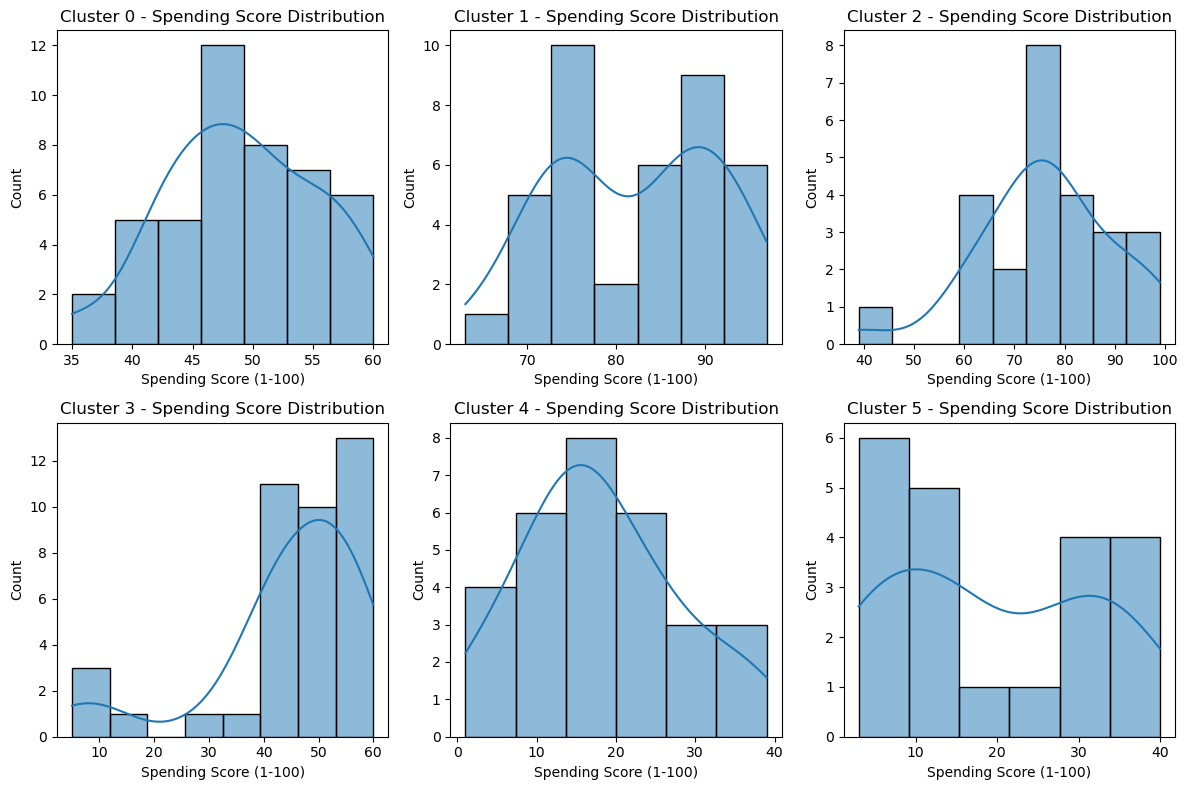

In [18]:
original_data = pd.read_csv(r'C:\Users\suhas\OneDrive\Documents\projects\prodigy\sec prj\archive\Mall_Customers.csv')

original_data['Cluster'] = cluster_labels
# Analyze each cluster
cluster_analysis = original_data.groupby('Cluster').agg({
    'Age': ['mean', 'median'],
    'Annual Income (k$)': ['mean', 'median'],
    'Spending Score (1-100)': ['mean', 'median', 'count'],
    'Gender': lambda x: x.mode()[0]
})

print(cluster_analysis)

# Visualize the characteristics of each cluster
plt.figure(figsize=(12, 8))
for i in range(k):
    plt.subplot(2, 3, i+1)
    sns.histplot(original_data[original_data['Cluster'] == i]['Spending Score (1-100)'], kde=True)
    plt.title(f'Cluster {i} - Spending Score Distribution')
plt.tight_layout()
plt.show()